In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Myocardial infarction complications.csv")

In [ ]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1700, 124)

In [ ]:
# ID is not useful for analysis
df.drop("ID", axis=1, inplace=True)

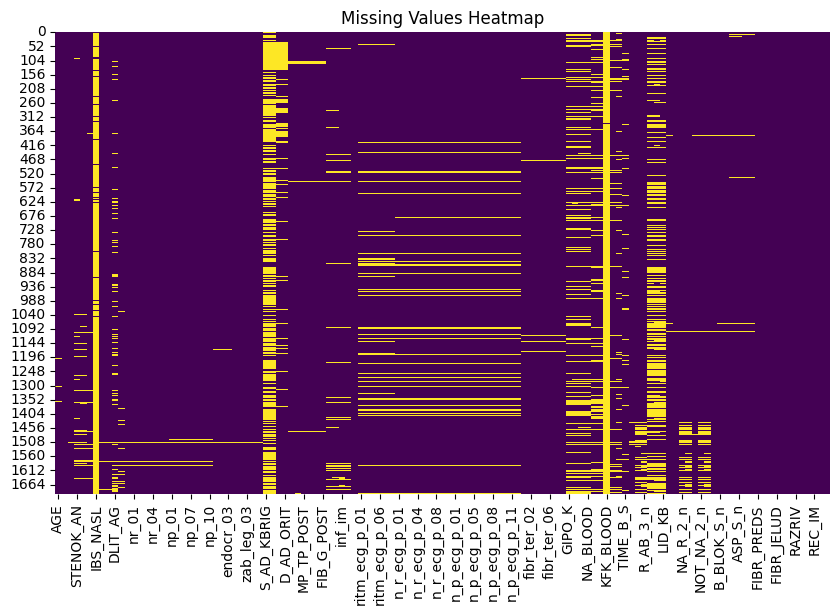

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
missing_percentage = df.isnull().mean() * 100

# Setting the desired threshold for null values
threshold = 35 #i.e threshold of 35%

# Filter columns that exceed the threshold
columns_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()

# Print the count and percentage of null values for the selected columns
print(df[columns_with_missing].isnull().sum())
print(missing_percentage[columns_with_missing])

IBS_NASL      1628
S_AD_KBRIG    1076
D_AD_KBRIG    1076
KFK_BLOOD     1696
NA_KB          657
NOT_NA_KB      686
LID_KB         677
dtype: int64
IBS_NASL      95.764706
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
KFK_BLOOD     99.764706
NA_KB         38.647059
NOT_NA_KB     40.352941
LID_KB        39.823529
dtype: float64


In [ ]:
df = df.drop(columns = columns_with_missing)

In [ ]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().mean() * 100).round(2)

# Create a DataFrame to store the results
null_summary = pd.DataFrame({'Null Percentage': null_percentage})

# Print the columns with their percentage of null values
print(null_summary[null_percentage > 0])

            Null Percentage
AGE                    0.47
INF_ANAM               0.24
STENOK_AN              6.24
FK_STENOK              4.29
IBS_POST               3.00
...                     ...
ANT_CA_S_n             0.76
GEPAR_S_n              1.00
ASP_S_n                1.00
TIKL_S_n               0.94
TRENT_S_n              0.94

[103 rows x 1 columns]


In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"])

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
unique count,62,2,4,7,5,3,4,2,8,5,...,2,2,2,2,2,2,2,2,2,8


In [ ]:
# Identify binary columns (columns with only 0 and 1)
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}]

# Impute mode for binary columns
for col in binary_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Identify categorical columns (columns with discrete values within a specific range)
categorical_columns = [col for col in df.columns if col not in binary_columns and df[col].dtype in [int, float]]

# Impute mode for categorical columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Identify continuous columns (columns with numeric values other than binary and categorical)
continuous_columns = [col for col in df.columns if col not in binary_columns and col not in categorical_columns]

# Impute mean for continuous columns
for col in continuous_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

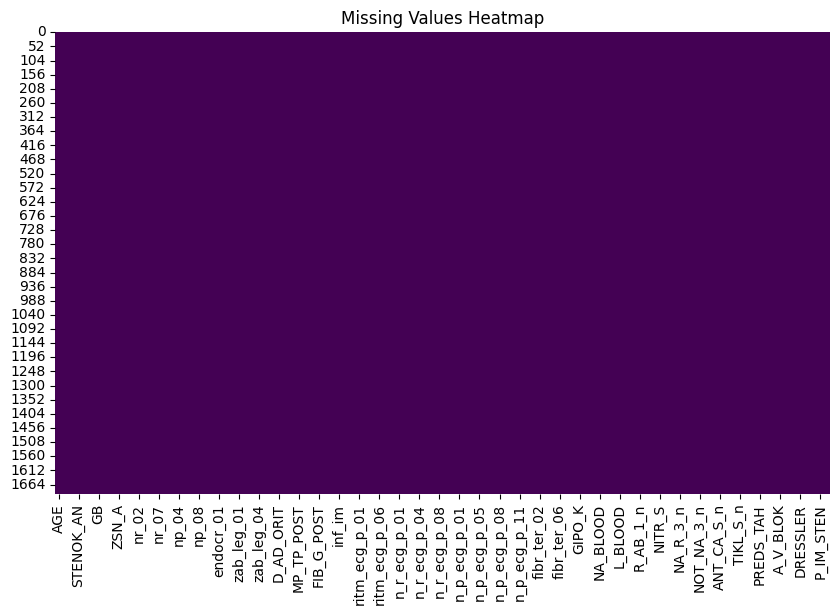

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

# Check the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()

# Check the number of duplicate rows in the DataFrame
print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 0


#Data Visualizations

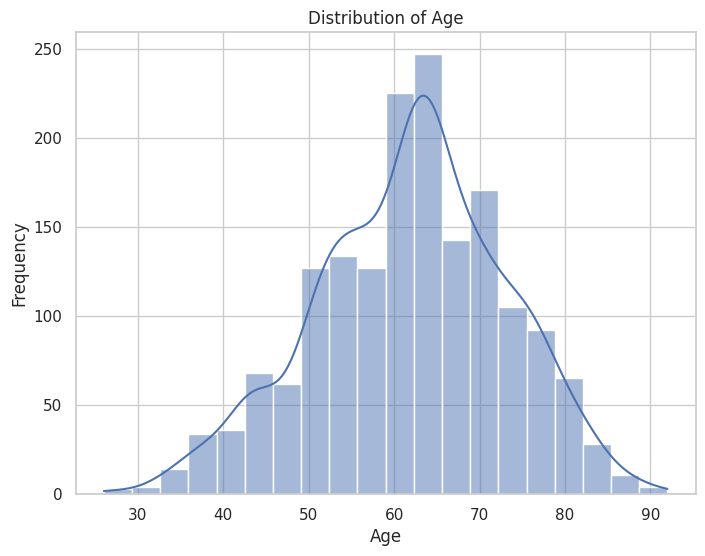

In [ ]:
# Set style
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

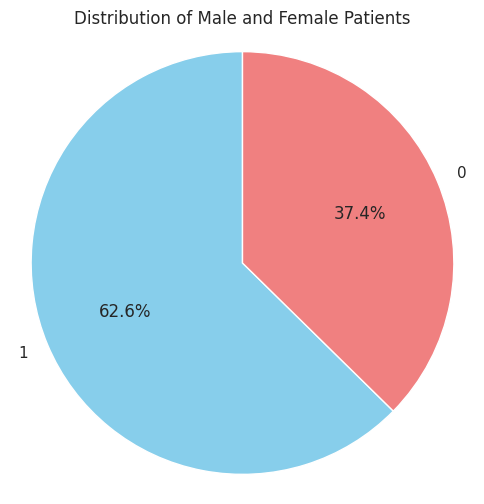

In [ ]:
# Pie chart to show the distribution of male and female patients
plt.figure(figsize=(6, 6))
gender_counts = df['SEX'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Male and Female Patients')
plt.axis('equal')
plt.show()

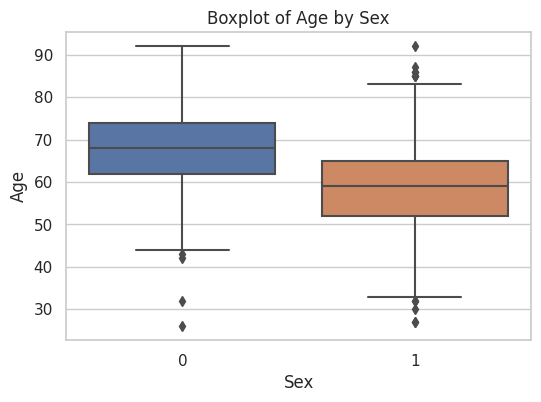

In [ ]:
# Boxplot of AGE vs. SEX
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='SEX', y='AGE')
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

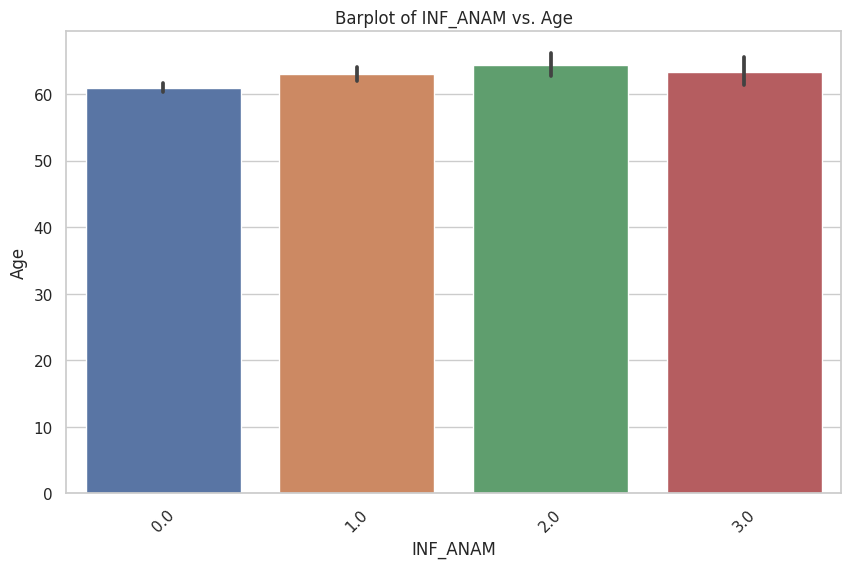

In [ ]:
 # Barplot of INR_ANAM
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='INF_ANAM', y='AGE')
plt.title('Barplot of INF_ANAM vs. Age')
plt.xlabel('INF_ANAM')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Zero: This category indicates that there have been no recorded instances of myocardial infarctions in the individual's medical history.

One: This category indicates that there has been one recorded instance of myocardial infarction in the individual's medical history.

Two: This category indicates that there have been two recorded instances of myocardial infarctions in the individual's medical history.

Three and More: This category indicates that there have been three or more recorded instances of myocardial infarctions in the individual's medical history.

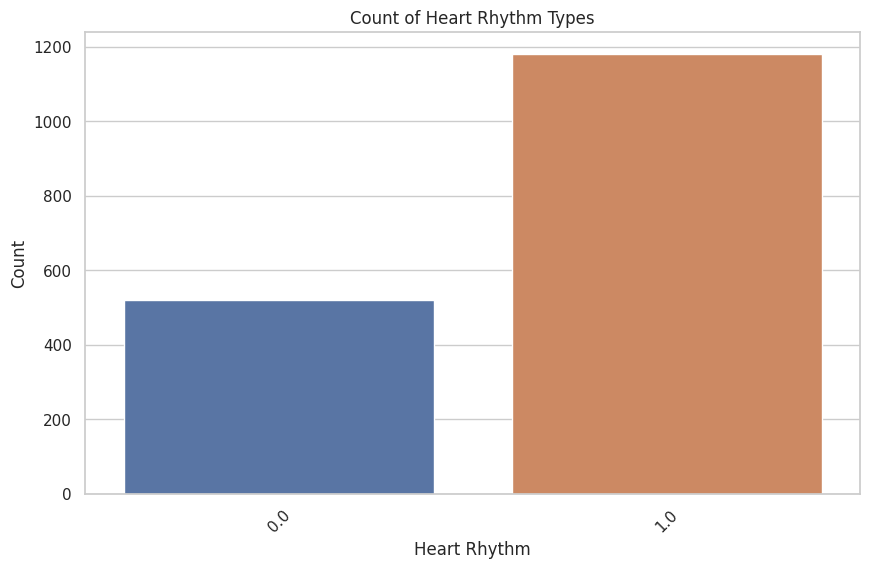

In [ ]:
# Count of Heart Rhythm Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ritm_ecg_p_01')
plt.title('Count of Heart Rhythm Types')
plt.xlabel('Heart Rhythm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The majority of individuals (approximately 60.53%) had a heart rhythm classified as sinus rhythm when admitted to the hospital, while a smaller proportion (approximately 30.53%) did not have a sinus rhythm.

The "yes"(1) category indicating a sinus rhythm is generally considered to be a healthier state compared to the "no"(0) category, which suggests the presence of an abnormal heart rhythm.

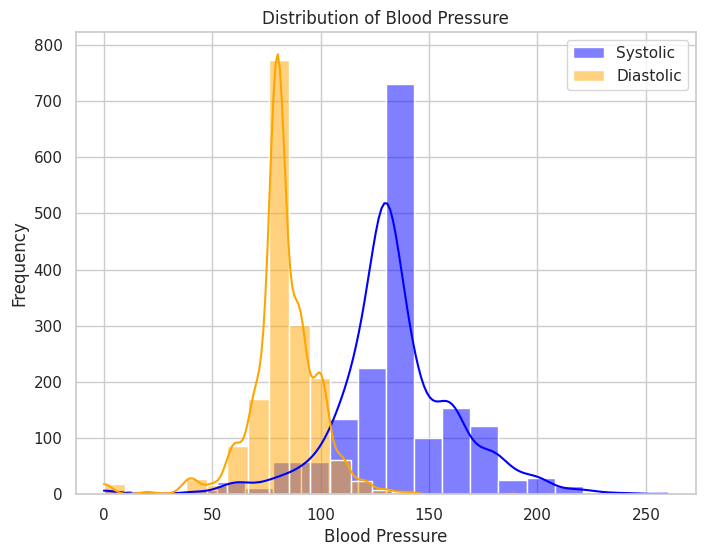

In [ ]:
# Distribution of Blood Pressure (Systolic and Diastolic)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='S_AD_ORIT', bins=20, kde=True, color='blue', label='Systolic')
sns.histplot(data=df, x='D_AD_ORIT', bins=20, kde=True, color='orange', label='Diastolic')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The histogram of blood pressure reveals a peak frequency for systolic readings around 120-140 and for diastolic readings around 70-80, which aligns with normal blood pressure ranges. However, the extended tails towards higher values for both systolic and diastolic measurements could indicate potential outliers or hypertensive cases that might require closer attention and monitoring in the context of myocardial infarction risk assessment.

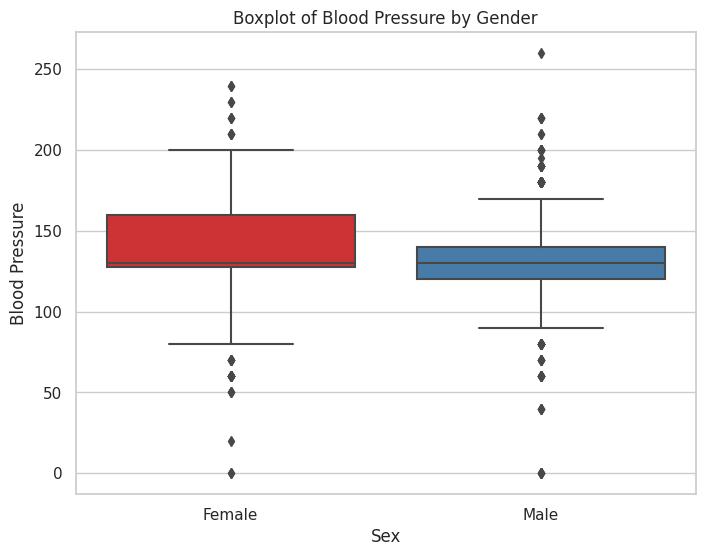

In [ ]:
# Boxplot of Blood Pressure by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SEX', y='S_AD_ORIT', palette='Set1')
plt.title('Boxplot of Blood Pressure by Gender')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

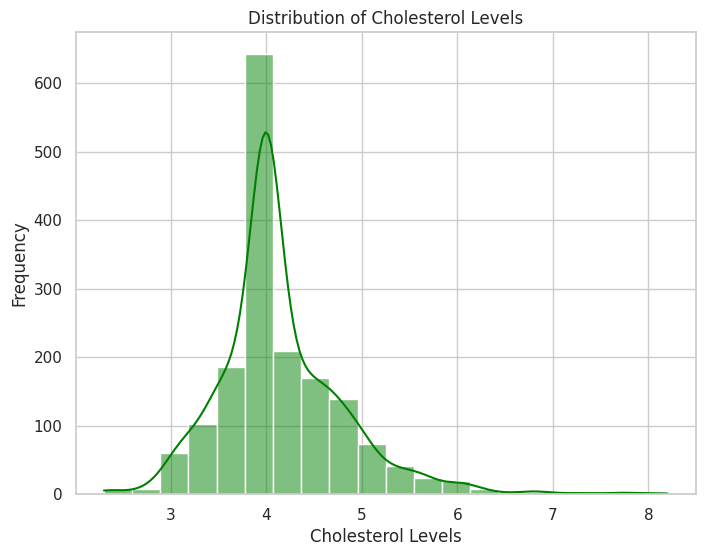

In [ ]:
# Distribution of Cholesterol Levels
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='K_BLOOD', bins=20, kde=True, color='green')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.show()

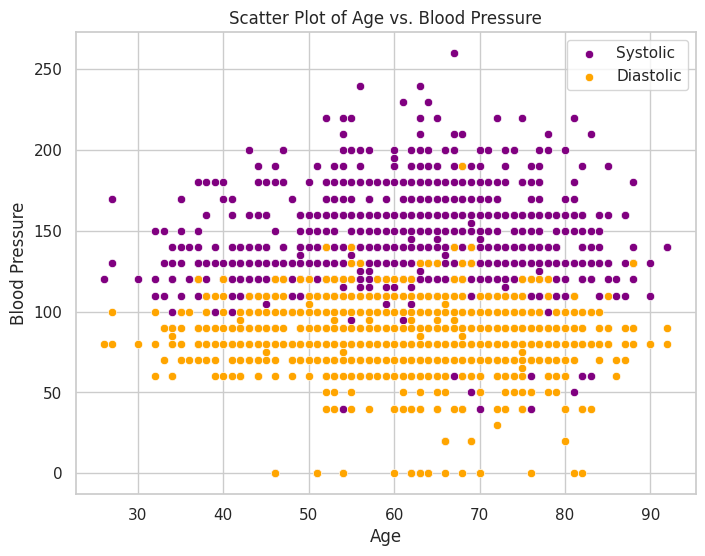

In [ ]:
# Scatter Plot of Age vs. Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AGE', y='S_AD_ORIT', color='purple', label='Systolic')
sns.scatterplot(data=df, x='AGE', y='D_AD_ORIT', color='orange', label='Diastolic')
plt.title('Scatter Plot of Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

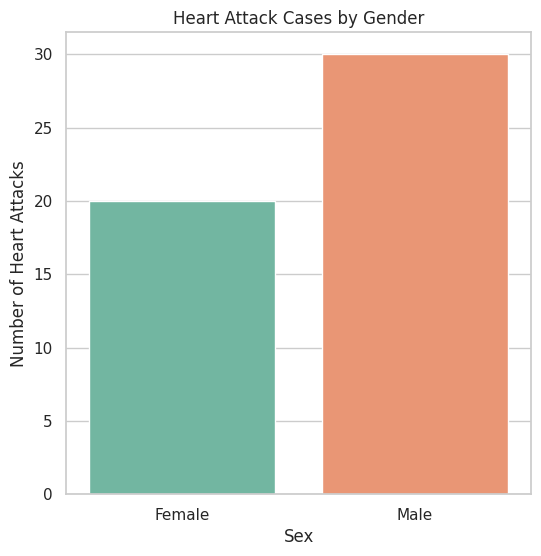

In [ ]:
# Bar Plot of Heart Attack Cases by Gender
heart_attack_counts = df.groupby('SEX')['IM_PG_P'].sum()
plt.figure(figsize=(6, 6))
sns.barplot(x=heart_attack_counts.index, y=heart_attack_counts.values, palette='Set2')
plt.title('Heart Attack Cases by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Heart Attacks')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

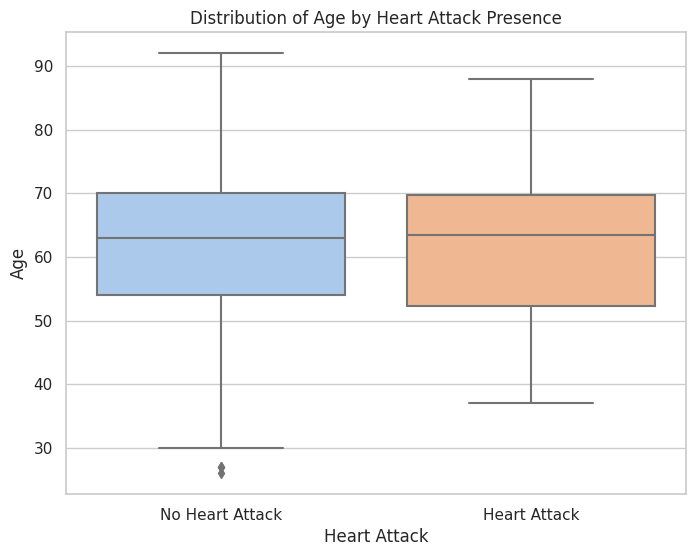

In [ ]:
# Distribution of Age by Heart Attack Presence
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='IM_PG_P', y='AGE', palette='pastel')
plt.title('Distribution of Age by Heart Attack Presence')
plt.xlabel('Heart Attack')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

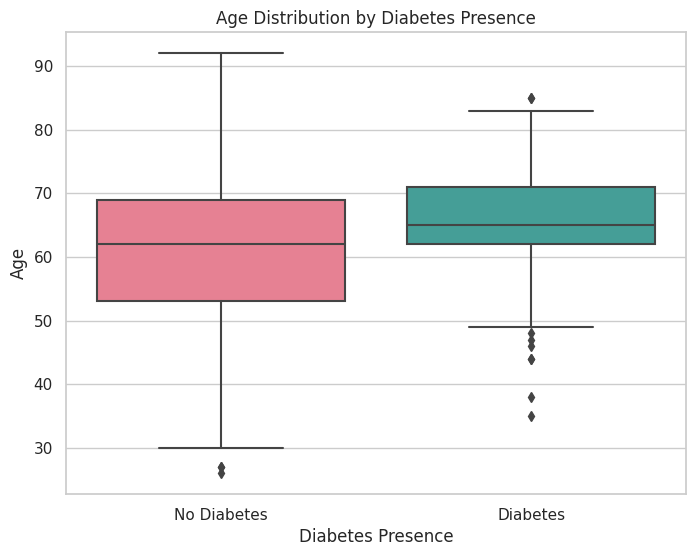

In [ ]:
# Box Plot of Age by Diabetes Presence
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='endocr_01', y='AGE', palette='husl')
plt.title('Age Distribution by Diabetes Presence')
plt.xlabel('Diabetes Presence')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

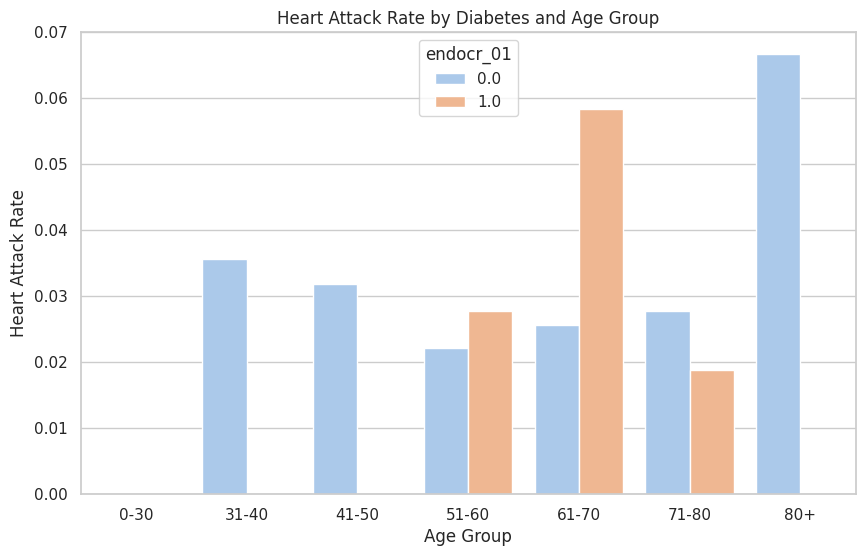

In [ ]:
plt.figure(figsize=(10, 6))
df['Age_Group'] = pd.cut(df['AGE'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'])
grouped = df.groupby(['endocr_01', 'Age_Group'])['IM_PG_P'].mean().reset_index()
sns.barplot(data=grouped, x='Age_Group', y='IM_PG_P', hue='endocr_01', palette='pastel')
plt.title('Heart Attack Rate by Diabetes and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Rate')
plt.show()

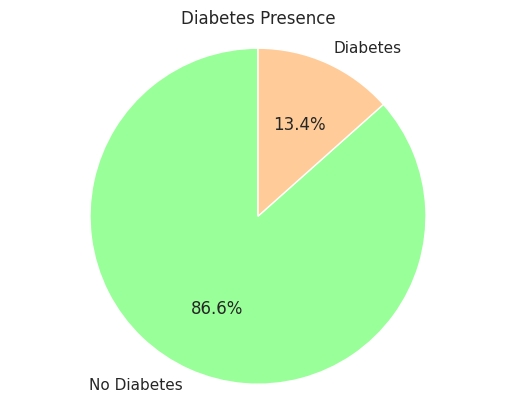

In [ ]:
# Pie Chart of Diabetes Presence
diabetes_counts = df['endocr_01'].value_counts()
labels = ['No Diabetes', 'Diabetes']
colors = ['#99ff99', '#ffcc99']
plt.pie(diabetes_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Presence')
plt.axis('equal')
plt.show()

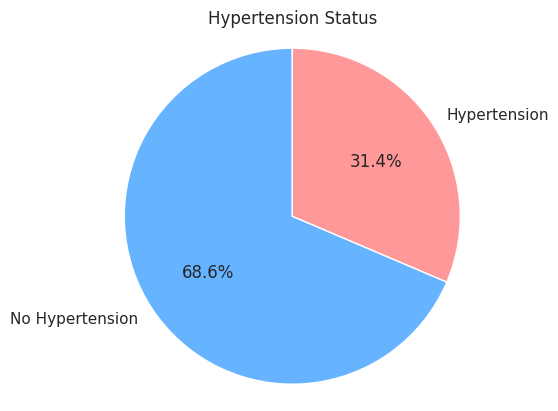

In [ ]:
# Pie Chart of Hypertension Status
hypertension_counts = df['GIPO_K'].value_counts()
labels = ['No Hypertension', 'Hypertension']
colors = ['#66b3ff', '#ff9999']
plt.pie(hypertension_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Hypertension Status')
plt.axis('equal')
plt.show()

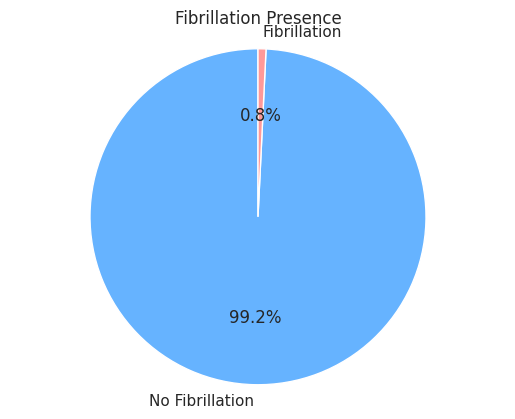

In [ ]:
# Pie Chart of Fibrillation Presence
fibrillation_counts = df['fibr_ter_01'].value_counts()
labels = ['No Fibrillation', 'Fibrillation']
colors = ['#66b3ff', '#ff9999']
plt.pie(fibrillation_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Fibrillation Presence')
plt.axis('equal')
plt.show()

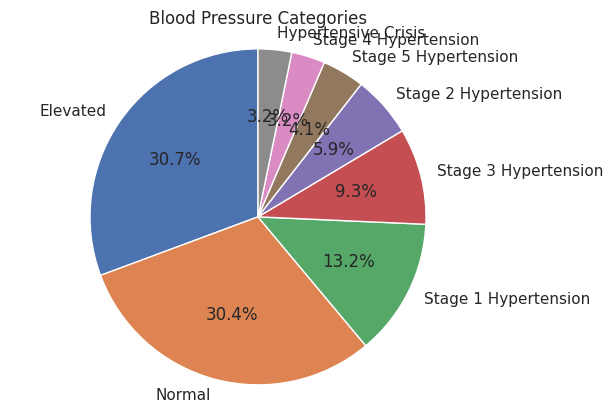

In [ ]:
# Pie Chart of Blood Pressure Categories
bins = [0, 120, 130, 140, 150, 160, 170, 180, 200]
labels = ['Normal', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Stage 3 Hypertension', 'Stage 4 Hypertension', 'Stage 5 Hypertension', 'Hypertensive Crisis']
df['BP_Category'] = pd.cut(df['S_AD_ORIT'], bins=bins, labels=labels)
bp_category_counts = df['BP_Category'].value_counts()
plt.pie(bp_category_counts, labels=bp_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Blood Pressure Categories')
plt.axis('equal')
plt.show()

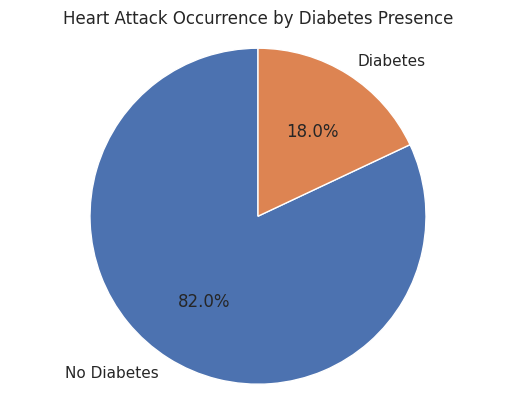

In [ ]:
# Pie Chart of Heart Attack Occurrence by Diabetes Presence
diabetes_heart_attack_counts = df.groupby('endocr_01')['IM_PG_P'].sum()
labels = ['No Diabetes', 'Diabetes']
plt.pie(diabetes_heart_attack_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Attack Occurrence by Diabetes Presence')
plt.axis('equal')
plt.show()

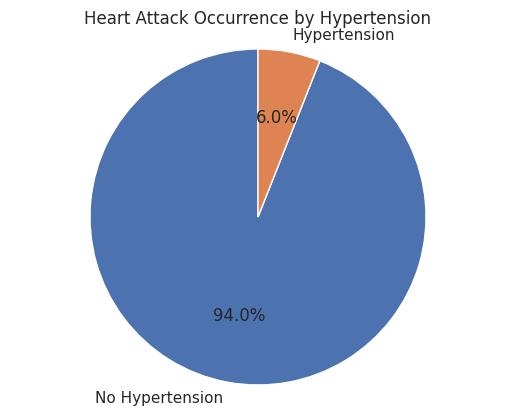

In [ ]:
# Pie Chart of Heart Attack Occurrence by Hypertension
hypertension_heart_attack_counts = df.groupby('SIM_GIPERT')['IM_PG_P'].sum()
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_heart_attack_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Attack Occurrence by Hypertension')
plt.axis('equal')
plt.show()

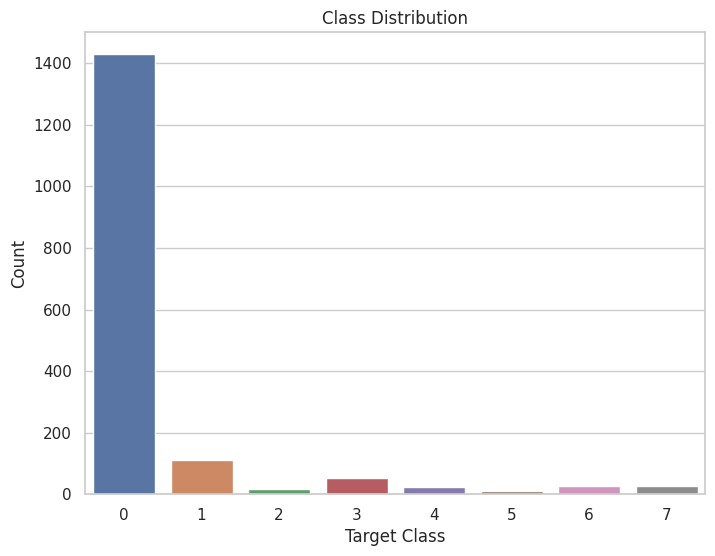

Class Distribution:
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64


In [ ]:
# Calculate class distribution
class_counts = df['LET_IS'].value_counts()

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='LET_IS', data=df)
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Print class counts
print("Class Distribution:")
print(class_counts)


#Balancing Data and Resampling

In [ ]:
#Data Balancing,Model building and Evaluation Techniques in Next Notebook
#Notebook_name: MCI_Feature_Selection_Model_Building_Evaluation_techniques.ipynb